In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [2]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X, y = mnist["data"], mnist["target"]
display(X.shape)
display(y.shape)

(70000, 784)

(70000,)

(([], []), ([], []))

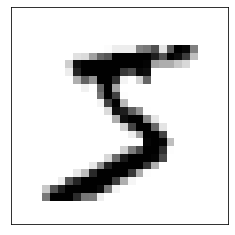

In [8]:
some_digit = X[0]
some_digit_image = X[0].reshape(28,28)

plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation = "nearest")
plt.xticks([]), plt.yticks([])

In [9]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [14]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

In [17]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [19]:
sgd_clf.predict([some_digit])

array([ True])

In [20]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [21]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
    
never5clf = Never5Classifier()
cross_val_score(never5clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

In the first model that we built, the accuracy was quite high apparently. But on building a classifier that always predicts not 5, we see that the accuracy is still around 91%. This is due to the fact that the **number of non-5s are quite higher than 5 that will be biasing the classifier**.

To evade this issue we'll be looking at some further performance measures other than accuracy:
- Precision - How many of the positive predictions were correct
- Recall - How many of the positive instances were being predicted correctly
- F1 Score - favours classifiers with almost similar precision and recall scores
- ROC

All these will be represented in a **Confusion Matrix**.

In [22]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [23]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [25]:
from sklearn.metrics import precision_score, recall_score, f1_score

display(precision_score(y_train_5, y_train_pred))
display(recall_score(y_train_5, y_train_pred))
display(f1_score(y_train_5, y_train_pred))

0.8370879772350012

0.6511713705958311

0.7325171197343846